In [31]:
import pandas as pd
import re
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import os


In [32]:
# Read CSV
df = pd.read_csv("Nepali_Treking_EnhancedV2.csv");
df.head()

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,0,Everest Base Camp Trek,"\n$1,420 USD",16 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,9/13/2022,Non-Binary,...,0,total,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
1,1,Everest Base Camp Short Trek,"\n$1,295 USD",14 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,09/04/2021,Female,...,40,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Everest Base Camp Heli Shuttle Trek,\n$2000 USD,12 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/25/2021,Female,...,80,Albania,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
3,3,Everest Base Camp Heli Trek,"\n$3,300 USD",11 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/28/2022,Non-Binary,...,120,Algeria,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
4,4,Everest Base Camp Trek for Seniors,"\n$1,800 USD",20 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,10/21/2021,Non-Binary,...,200,Andra,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5


In [33]:
# Alphabetical Order
df = df.sort_values("Trek")
df

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
90,90,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,08/07/2023,Transgender,...,3980,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,164,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,...,7050,Slovenia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
238,238,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,05/07/2022,Non-Binary,...,1520,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,10/07/2022,Male,...,560,Belgium,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
312,312,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,...,4540,Malawi,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,...,4960,Mongolia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
340,340,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,...,5860,Pakistan,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
44,44,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,...,1910,Croatia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
192,192,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,03/12/2023,Non-Binary,...,8400,united states of america,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0


In [34]:
# Dropping Unnecessary Columns
df = df.drop("Unnamed: 0", axis=1)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
90,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,08/07/2023,Transgender,27,...,3980,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,28,...,7050,Slovenia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
238,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,05/07/2022,Non-Binary,29,...,1520,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,10/07/2022,Male,28,...,560,Belgium,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
312,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,32,...,4540,Malawi,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,31,...,4960,Mongolia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
340,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,5860,Pakistan,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
44,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,1910,Croatia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
192,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,03/12/2023,Non-Binary,28,...,8400,united states of america,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0


In [35]:
# Index Reset
df= df.reset_index(drop=True)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,08/07/2023,Transgender,27,...,3980,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,28,...,7050,Slovenia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
2,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,05/07/2022,Non-Binary,29,...,1520,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,10/07/2022,Male,28,...,560,Belgium,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
4,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,32,...,4540,Malawi,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,31,...,4960,Mongolia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
379,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,5860,Pakistan,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
380,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,1910,Croatia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
381,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,03/12/2023,Non-Binary,28,...,8400,united states of america,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0


# Data Clean

In [36]:
# Cleaning Treak Column
df['Trek'] = df['Trek'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,08/07/2023,Transgender,27,...,3980,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Transgender,28,...,7050,Slovenia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
2,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,05/07/2022,Non-Binary,29,...,1520,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,10/07/2022,Male,28,...,560,Belgium,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
4,Annapurna Base Camp Heli Trek,"\n$1,750 USD",9 Days,Easy To Moderate,4210 m,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Non-Binary,32,...,4540,Malawi,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Non-Binary,31,...,4960,Mongolia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
379,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,5860,Pakistan,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
380,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,1910,Croatia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
381,Upper Mustang Trek,"$1,499 USD",17 Days,Moderate+Demanding,"3,870m",Hotel/Guesthouse,Jan - May & Sept - Dec,03/12/2023,Non-Binary,28,...,8400,united states of america,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0


In [37]:
# Cleaning Cost, Time, Altitude, Sex Column
df['Cost'] = df['Cost'].str.replace(r'[^\d]', '', regex=True)
df['Time'] = df['Time'].str.replace(r'[^\d]', '', regex=True)

df["Max Altitude"] = (
    df["Max Altitude"]
    .str.replace("m", "")
    .str.replace(",", "")
    .str.strip()
    .astype(float)
)

df['Sex'] = df['Sex'].apply(
    lambda sex: "Other" if sex == "Non-Binary" or sex == "Transgender" else sex
)
# df['Max Altitude'] = df['Max Altitude'].str.replace(r'[^\d]', '', regex=True)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,08/07/2023,Other,27,...,3980,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Other,28,...,7050,Slovenia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
2,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,05/07/2022,Other,29,...,1520,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,10/07/2022,Male,28,...,560,Belgium,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
4,Annapurna Base Camp Heli Trek,1750,9,Easy To Moderate,4210.0,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Other,32,...,4540,Malawi,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,Moderate+Demanding,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Other,31,...,4960,Mongolia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
379,Upper Mustang Trek,1499,17,Moderate+Demanding,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,5860,Pakistan,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
380,Upper Mustang Trek,1499,17,Moderate+Demanding,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,1910,Croatia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
381,Upper Mustang Trek,1499,17,Moderate+Demanding,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,03/12/2023,Other,28,...,8400,united states of america,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0


In [38]:
# Trek Grade Mapping
grade_mapping = {
    'Easy': 1,
    'Easy To Moderate': 2,
    'Easy-Moderate': 2,
    'Light': 3,
    'Light+Moderate': 4,
    'Moderate': 5,
    'Moderate+Demanding': 6,
    'Moderate-Hard': 7,
    'Demanding': 8,
    'Demanding+Challenging': 9,
    'Strenuous': 10
}

df["Trip Grade"] = df['Trip Grade'].map(grade_mapping)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,08/07/2023,Other,27,...,3980,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Other,28,...,7050,Slovenia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
2,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,05/07/2022,Other,29,...,1520,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,10/07/2022,Male,28,...,560,Belgium,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
4,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Other,32,...,4540,Malawi,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Other,31,...,4960,Mongolia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
379,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,5860,Pakistan,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
380,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,1910,Croatia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
381,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,03/12/2023,Other,28,...,8400,united states of america,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0


In [39]:
# Cleaning Best Travel Time Column
df["Best Travel Time"] = (
    df["Best Travel Time"].str.replace(".", "", regex=False)
    .str.replace("Setpt", "Sept", regex=False)
    .str.title()
)

# Further clean to standardize "Month - Month & Month - Month" format
def clean_travel_time(row):
    pattern = r'([A-Za-z]{3,4})\s*-\s*([A-Za-z]{3,4})\s*&\s*([A-Za-z]{3,4})\s*-\s*([A-Za-z]{3,4})'
    match = re.match(pattern, row)

    if match:
        return f"{match.group(1)} - {match.group(2)} & {match.group(3)} - {match.group(4)}"
    
    return row 

df["Best Travel Time"] = df["Best Travel Time"].apply(clean_travel_time)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,08/07/2023,Other,27,...,3980,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,5/27/2023,Other,28,...,7050,Slovenia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
2,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,05/07/2022,Other,29,...,1520,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,10/07/2022,Male,28,...,560,Belgium,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
4,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,March - May & Sept - Dec,6/24/2022,Other,32,...,4540,Malawi,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,5/22/2022,Other,31,...,4960,Mongolia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
379,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,9/29/2021,Male,27,...,5860,Pakistan,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
380,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,3/23/2022,Female,25,...,1910,Croatia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
381,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Jan - May & Sept - Dec,03/12/2023,Other,28,...,8400,united states of america,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0


In [40]:
# Best travel time mapping 
seasons = {
    'Jan - May & Sept - Dec': 'Spring/Autumn/Winter',
    'March - May & Sept - Dec': 'Spring/Autumn',
    'March - May & Sept - Nov': 'Spring/Autumn',
    'March-May & Sept-Dec':'Spring/Autumn'
}

df["Best Travel Time"] = df["Best Travel Time"].map(seasons)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,08/07/2023,Other,27,...,3980,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,5/27/2023,Other,28,...,7050,Slovenia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
2,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,05/07/2022,Other,29,...,1520,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,10/07/2022,Male,28,...,560,Belgium,Beginner,Rainy,8.0,No Guide,NaN,Adventure,Altitude Sickness,3.0
4,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,6/24/2022,Other,32,...,4540,Malawi,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,5/22/2022,Other,31,...,4960,Mongolia,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
379,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,9/29/2021,Male,27,...,5860,Pakistan,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
380,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,3/23/2022,Female,25,...,1910,Croatia,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5
381,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,03/12/2023,Other,28,...,8400,united states of america,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0


In [41]:
# Fitness Mapping
fitness_mapping = {
    'Beginner': 0,
    'Intermediate': 1,
    'Advanced': 2
}

df['Fitness Level'] = df['Fitness Level'].map(fitness_mapping)

mode_value = df['Fitness Level'].mode()[0]
df['Fitness Level'].fillna(mode_value, inplace=True)


In [42]:
# Health Incidents Mapping
df['Health Incidents'] = df['Health Incidents'].apply(lambda x: 1 if pd.notna(x) and x != '' else 0)

In [43]:
# Guide Mapping
guide_mapping = {
    'No Guide': 0,
    "Guide": 1
}

df['Guide/No Guide'] = df['Guide/No Guide'].map(guide_mapping)

mode = df['Guide/No Guide'].mode()[0]
df['Guide/No Guide'].fillna(mode, inplace=True)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,08/07/2023,Other,27,...,3980,Kazakhstan,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN
1,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,5/27/2023,Other,28,...,7050,Slovenia,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5
2,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,05/07/2022,Other,29,...,1520,Chile,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN
3,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,10/07/2022,Male,28,...,560,Belgium,0.0,Rainy,8.0,0.0,NaN,Adventure,1,3.0
4,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,6/24/2022,Other,32,...,4540,Malawi,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,5/22/2022,Other,31,...,4960,Mongolia,1.0,Clear,5.0,1.0,Poles,Leisure,0,4.0
379,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,9/29/2021,Male,27,...,5860,Pakistan,1.0,Clear,10.0,1.0,Poles,Leisure,0,4.5
380,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,3/23/2022,Female,25,...,1910,Croatia,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5
381,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,03/12/2023,Other,28,...,8400,united states of america,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0


In [44]:
# Filling Trekking Group Size Missing Values
average = int(df['Trekking Group Size'].mean())
df['Trekking Group Size'].fillna(average, inplace=True)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,08/07/2023,Other,27,...,3980,Kazakhstan,0.0,NaN,8.0,1.0,NaN,NaN,0,NaN
1,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,5/27/2023,Other,28,...,7050,Slovenia,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5
2,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,05/07/2022,Other,29,...,1520,Chile,0.0,NaN,8.0,1.0,NaN,NaN,0,NaN
3,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,10/07/2022,Male,28,...,560,Belgium,0.0,Rainy,8.0,0.0,NaN,Adventure,1,3.0
4,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouses,Spring/Autumn,6/24/2022,Other,32,...,4540,Malawi,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,5/22/2022,Other,31,...,4960,Mongolia,1.0,Clear,5.0,1.0,Poles,Leisure,0,4.0
379,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,9/29/2021,Male,27,...,5860,Pakistan,1.0,Clear,10.0,1.0,Poles,Leisure,0,4.5
380,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,3/23/2022,Female,25,...,1910,Croatia,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5
381,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guesthouse,Spring/Autumn/Winter,03/12/2023,Other,28,...,8400,united states of america,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0


In [45]:
# Accomodation Mapping
accomodation_mapping = {
    'Hotel/Guest Houses': 'Hotel/Guest House',
    'Hotel/Guesthouses': 'Hotel/Guest House',
    'Teahouses/Lodges': 'Teahouse/Lodge',
    'Hotel/Teahouse': 'Hotel/Teahouse',
    'Hotel/Guesthouse': 'Hotel/Guest House',
    'Hotel/Lodges': 'Hotel/Lodge',
    'Hotel/Teahouses': 'Hotel/Teahouse',
    'Hotel/Luxury Lodges': 'Hotel/Luxury Lodge'
}

df['Accomodation'] = df['Accomodation'].map(accomodation_mapping)

In [46]:
# Cleaning Propose of Travel Column
df['Purpose of Travel'].fillna('Unknown', inplace=True)
df

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,08/07/2023,Other,27,...,3980,Kazakhstan,0.0,NaN,8.0,1.0,NaN,Unknown,0,NaN
1,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,5/27/2023,Other,28,...,7050,Slovenia,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5
2,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,05/07/2022,Other,29,...,1520,Chile,0.0,NaN,8.0,1.0,NaN,Unknown,0,NaN
3,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,10/07/2022,Male,28,...,560,Belgium,0.0,Rainy,8.0,0.0,NaN,Adventure,1,3.0
4,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,6/24/2022,Other,32,...,4540,Malawi,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,5/22/2022,Other,31,...,4960,Mongolia,1.0,Clear,5.0,1.0,Poles,Leisure,0,4.0
379,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,9/29/2021,Male,27,...,5860,Pakistan,1.0,Clear,10.0,1.0,Poles,Leisure,0,4.5
380,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,3/23/2022,Female,25,...,1910,Croatia,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5
381,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,03/12/2023,Other,28,...,8400,united states of america,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0


In [47]:
# Clustering
df['Cluster'] = -1

df.loc[df['Trek'].str.contains('Annapurna', case=False), 'Cluster'] = 1
df.loc[df['Trek'].str.contains('Everest', case=False), 'Cluster'] = 2
df.loc[df['Trek'].str.contains('Poon Hill', case=False), 'Cluster'] = 3
df.loc[df['Trek'].str.contains('Gokyo', case=False), 'Cluster'] = 4
df.loc[df['Trek'].str.contains('Helambu', case=False), 'Cluster'] = 5
df.loc[df['Trek'].str.contains('Kanchenjunga', case=False), 'Cluster'] = 6
df.loc[df['Trek'].str.contains('Langtang', case=False), 'Cluster'] = 7
df.loc[df['Trek'].str.contains('Makalu', case=False), 'Cluster'] = 8
df.loc[df['Trek'].str.contains('Manaslu', case=False), 'Cluster'] = 9
df.loc[df['Trek'].str.contains('Mardi', case=False), 'Cluster'] = 10
df.loc[df['Trek'].str.contains('Narphu', case=False), 'Cluster'] = 11
df.loc[df['Trek'].str.contains('Rara', case=False), 'Cluster'] = 12
df.loc[df['Trek'].str.contains('Mustang', case=False), 'Cluster'] = 13

df = df[df['Cluster'] != -1]

df


,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction,Cluster
0,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,08/07/2023,Other,27,...,Kazakhstan,0.0,NaN,8.0,1.0,NaN,Unknown,0,NaN,1
1,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,5/27/2023,Other,28,...,Slovenia,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5,1
2,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,05/07/2022,Other,29,...,Chile,0.0,NaN,8.0,1.0,NaN,Unknown,0,NaN,1
3,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,10/07/2022,Male,28,...,Belgium,0.0,Rainy,8.0,0.0,NaN,Adventure,1,3.0,1
4,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,6/24/2022,Other,32,...,Malawi,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,5/22/2022,Other,31,...,Mongolia,1.0,Clear,5.0,1.0,Poles,Leisure,0,4.0,13
379,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,9/29/2021,Male,27,...,Pakistan,1.0,Clear,10.0,1.0,Poles,Leisure,0,4.5,13
380,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,3/23/2022,Female,25,...,Croatia,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5,13
381,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,03/12/2023,Other,28,...,united states of america,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0,13


In [48]:
# Annapurna Recommendation
def trek_recommendation(row):
    # Annapurna recommendation (Moderate difficulty)
    if row['Cluster'] == 1:  # Annapurna
        if row['Age'] < 16 or row['Fitness Level'] < 1 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 5:
            return 0
        return 1

    # Everest recommendation (Strenuous difficulty)
    elif row['Cluster'] == 2:  # Everest
        if row['Age'] < 18 or row['Fitness Level'] < 2 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 3:
            return 0
        return 1

    # Poon Hill recommendation (Easy)
    elif row['Cluster'] == 3:  # Poon Hill
        if row['Age'] < 14 or row['Fitness Level'] < 1 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 2:
            return 0
        return 1

    # Gokyo recommendation (High altitude, strenuous)
    elif row['Cluster'] == 4:  # Gokyo
        if row['Age'] < 18 or row['Fitness Level'] < 2 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 4:
            return 0
        return 1

    # Helambu recommendation (Easy)
    elif row['Cluster'] == 5:  # Helambu
        if row['Age'] < 14 or row['Fitness Level'] < 1 or row['Health Incidents'] == 1:
            return 0
        if row['Trekking Group Size'] < 3:
            return 0
        return 1

    # Kanchenjunga recommendation (Very difficult)
    elif row['Cluster'] == 6:  # Kanchenjunga
        if row['Age'] < 18 or row['Fitness Level'] < 2 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 5:
            return 0
        return 1

    # Langtang recommendation (Moderate)
    elif row['Cluster'] == 7:  # Langtang
        if row['Age'] < 16 or row['Fitness Level'] < 1 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 3:
            return 0
        return 1

    # Makalu recommendation (Very difficult)
    elif row['Cluster'] == 8:  # Makalu
        if row['Age'] < 18 or row['Fitness Level'] < 2 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 4:
            return 0
        return 1

    # Manaslu recommendation (Strenuous)
    elif row['Cluster'] == 9:  # Manaslu
        if row['Age'] < 18 or row['Fitness Level'] < 2 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 5:
            return 0
        return 1

    # Mardi recommendation (Moderate)
    elif row['Cluster'] == 10:  # Mardi
        if row['Age'] < 16 or row['Fitness Level'] < 1 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 4:
            return 0
        return 1

    # Narphu recommendation (Very difficult)
    elif row['Cluster'] == 11:  # Narphu
        if row['Age'] < 18 or row['Fitness Level'] < 2 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 4:
            return 0
        return 1

    # Rara recommendation (Moderate)
    elif row['Cluster'] == 12:  # Rara
        if row['Age'] < 14 or row['Fitness Level'] < 1 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 2:
            return 0
        return 1

    # Mustang recommendation (Moderate)
    elif row['Cluster'] == 13:  # Mustang
        if row['Age'] < 16 or row['Fitness Level'] < 1 or row['Health Incidents'] == 1:
            return 0
        if row['Guide/No Guide'] == 0 or row['Trekking Group Size'] < 3:
            return 0
        return 1

# Apply the recommendation logic to the DataFrame
df['Recommendation'] = df.apply(trek_recommendation, axis=1)

df

/var/folders/5k/8v79yq9x6tq6jrygp62tqszr0000gn/T/ipykernel_22962/1610609396.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recommendation'] = df.apply(trek_recommendation, axis=1)


,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,Age,...,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction,Cluster,Recommendation
0,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,08/07/2023,Other,27,...,0.0,NaN,8.0,1.0,NaN,Unknown,0,NaN,1,0
1,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,5/27/2023,Other,28,...,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5,1,0
2,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,05/07/2022,Other,29,...,0.0,NaN,8.0,1.0,NaN,Unknown,0,NaN,1,0
3,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,10/07/2022,Male,28,...,0.0,Rainy,8.0,0.0,NaN,Adventure,1,3.0,1,0
4,Annapurna Base Camp Heli Trek,1750,9,2,4210.0,Hotel/Teahouse,Spring/Autumn,6/24/2022,Other,32,...,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,5/22/2022,Other,31,...,1.0,Clear,5.0,1.0,Poles,Leisure,0,4.0,13,1
379,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,9/29/2021,Male,27,...,1.0,Clear,10.0,1.0,Poles,Leisure,0,4.5,13,1
380,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,3/23/2022,Female,25,...,0.0,Cloudy,6.0,0.0,NaN,Adventure,1,3.5,13,0
381,Upper Mustang Trek,1499,17,6,3870.0,Hotel/Guest House,Spring/Autumn/Winter,03/12/2023,Other,28,...,2.0,Snowy,12.0,1.0,Oxygen,Charity,0,5.0,13,1


In [49]:
# Random Forest Classifier
df['Guide/No Guide'] = df['Guide/No Guide'].astype(int)

# Encode categorical features (if necessary)
label_encoder = LabelEncoder()

# Features for prediction
X = df[['Age', 'Fitness Level', 'Health Incidents', 'Guide/No Guide', 'Trekking Group Size', 'Cluster']]

y = df['Recommendation']

# 2. Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
clf.fit(X_train, y_train)

model_path = os.path.join(os.path.dirname('app'), 'model.pkl')
joblib.dump(clf, model_path)

/var/folders/5k/8v79yq9x6tq6jrygp62tqszr0000gn/T/ipykernel_22962/1994057428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Guide/No Guide'] = df['Guide/No Guide'].astype(int)


['model.pkl']

In [50]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)
model_path = os.path.join(os.path.dirname('app'), 'logistic_model.pkl')
joblib.dump(clf, model_path)

['logistic_model.pkl']

In [51]:
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Model Accuracy: {accuracy * 100:.2f}%")
# print("Classification Report:\n", report)

# # Use the model to predict for new data (example)
# new_input = pd.DataFrame({
#     'Age': [20],
#     'Fitness Level': [2],  # Intermediate
#     'Health Incidents': [1],  # No
#     'Guide/No Guide': [1],  # Yes
#     'Trekking Group Size': [5],
#     'Cluster': [1]  # Annapurna
# })

# # Predict recommendation for new input
# new_prediction = clf.predict(new_input)
# print("Recommendation:", "Yes" if new_prediction[0] == 1 else "No")

## Visualization

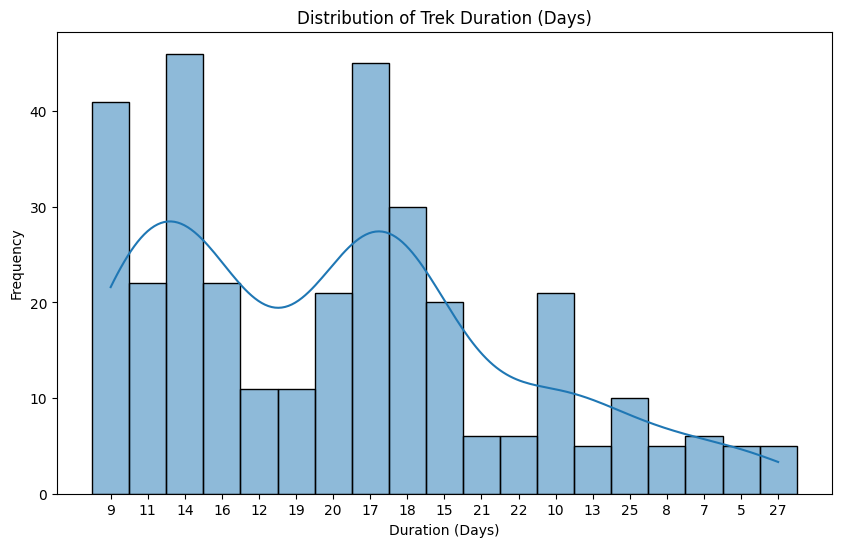

In [52]:
# Trek Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=15, kde=True)
plt.title('Distribution of Trek Duration (Days)')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.show()

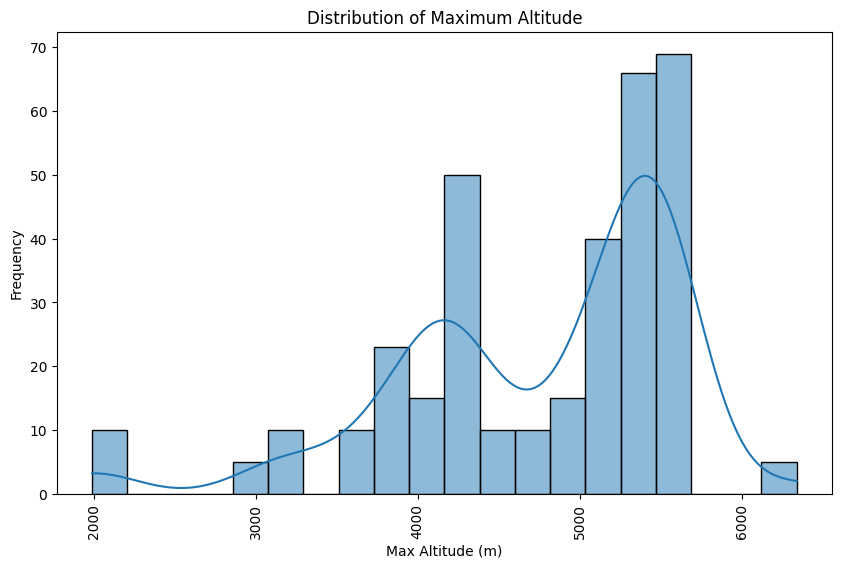

In [53]:
# Altitude Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Max Altitude'], bins=20, kde=True)
plt.title('Distribution of Maximum Altitude')
plt.xlabel('Max Altitude (m)')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

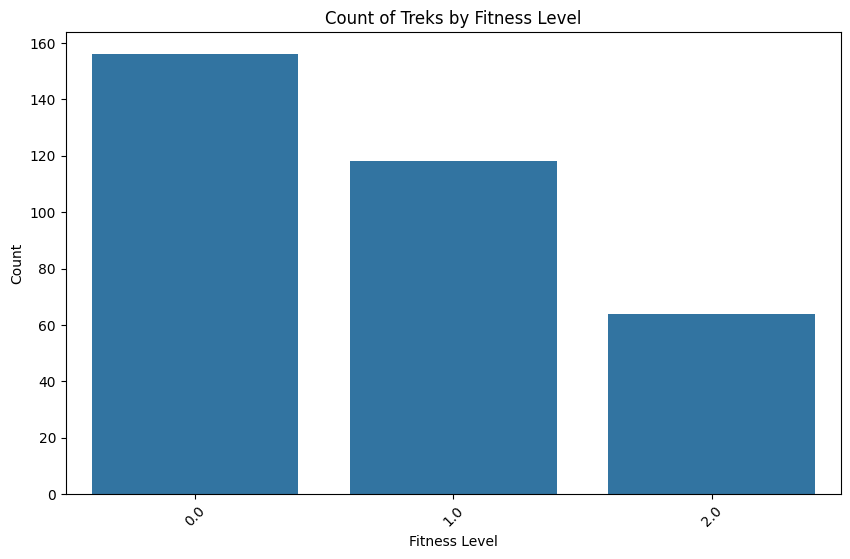

In [54]:
# Fitness Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Fitness Level', data=df, order=df['Fitness Level'].value_counts().index)
plt.title('Count of Treks by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

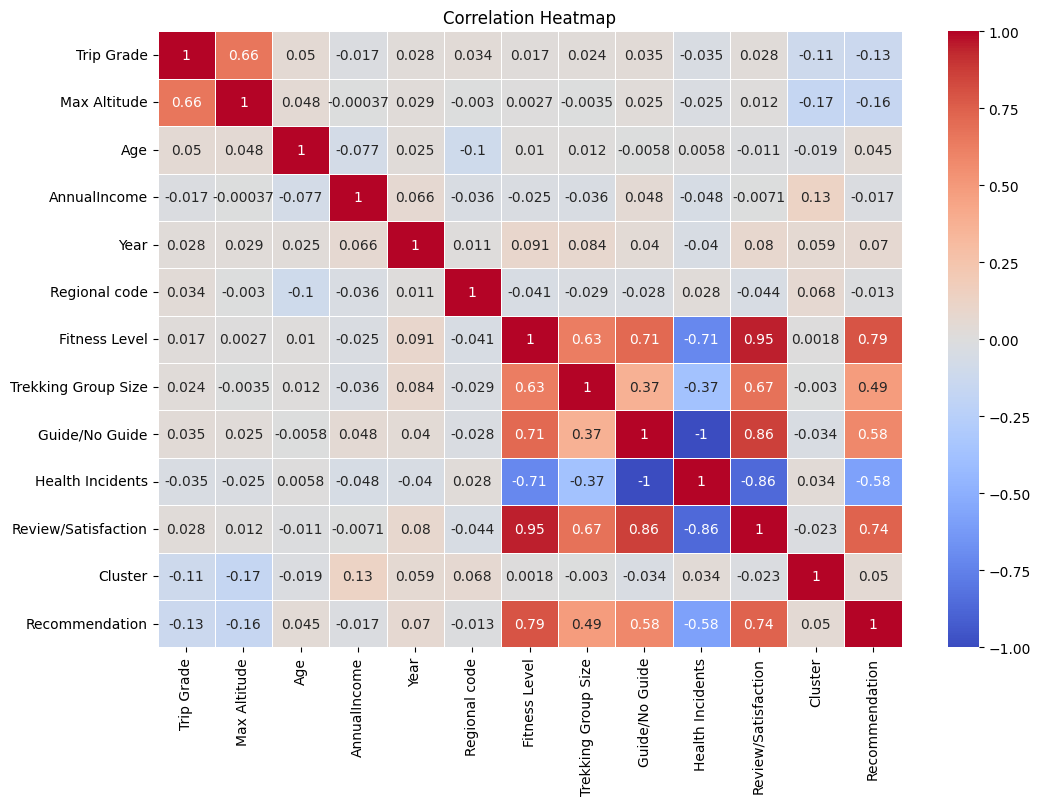

In [55]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=1), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
# Average Cost by Accomodation Type
# plt.figure(figsize=(10, 6))
# avg_cost_accommodation = df.groupby('Accomodation')['Cost'].mean().sort_values()
# avg_cost_accommodation.plot(kind='barh', color='skyblue')
# plt.title('Average Cost by Accommodation Type')
# plt.xlabel('Average Cost (USD)')
# plt.ylabel('Accommodation Type')
# plt.show()

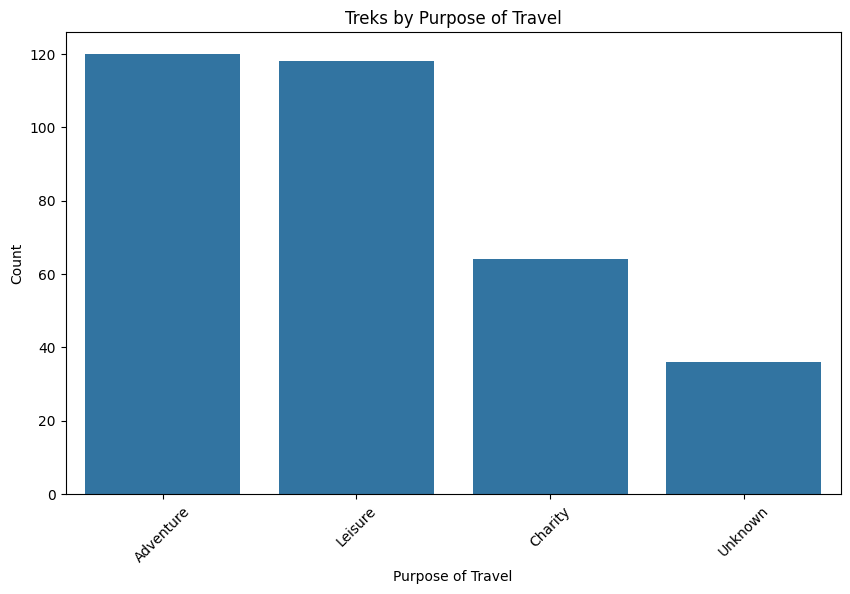

In [57]:
# Treks by Purpose of Travel
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose of Travel', data=df, order=df['Purpose of Travel'].value_counts().index)
plt.title('Treks by Purpose of Travel')
plt.xlabel('Purpose of Travel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Basic Info

In [58]:
cluster_1_data = df[df['Cluster'] == 1]

# Get the first row that matches Cluster 1
if not cluster_1_data.empty:
    first_row = cluster_1_data.iloc[0]
    info = {
        'Duration': first_row['Time'],
        'Difficulty': first_row['Trip Grade'],
        'Altitude': first_row['Max Altitude'],
        'BestSeason': first_row['Best Travel Time'],
        'Accomodation': first_row['Accomodation']
    }

print(info)

{'Duration': '9', 'Difficulty': 2, 'Altitude': 4210.0, 'BestSeason': 'Spring/Autumn', 'Accomodation': 'Hotel/Teahouse'}


In [59]:
df.to_csv('cleaned_dataset.csv')